# Fagdag 27. januar

### 7.3

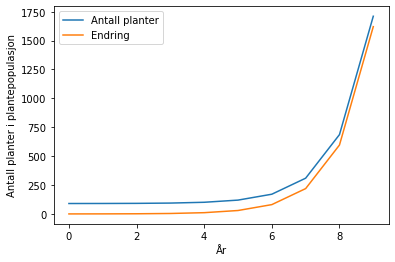

In [22]:
from pylab import *

def N(t):
    return 0.2 * e**t + 90

def derivert(N,t,dt):
    E = (N(t+dt) - N(t)) / dt
    return E

planter = []
endring = []
aar = []

dt = 1E-8

for i in range(10):
    planter.append(N(i))
    endring.append(derivert(N,i,dt))
    aar.append(i)

plot(aar, planter, label='Antall planter')
plot(aar, endring, label='Endring')
xlabel('År')
ylabel('Antall planter i plantepopulasjon')
legend()
show()

### 7.9

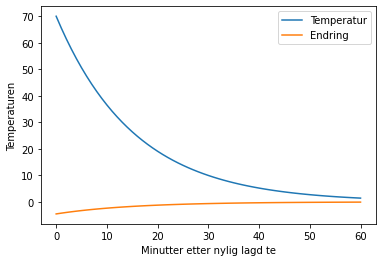

Ved element nr. 42 synker temperaturen med 0.3 ˚C.


In [42]:
from pylab import *

def T(t):
    return 70 * e**(-0.065*t)

def derivert(T,t,dt):
    Tder = (T(t+dt) - T(t)) / dt
    return Tder

temperatur = []
endring = []
minutter = []

dt = 60 / 1000

for i in range(61):
    temperatur.append(T(i))
    endring.append(derivert(T,i,dt))
    minutter.append(i)   

plot(minutter, temperatur, label='Temperatur')
plot(minutter, endring, label='Endring')
xlabel('Minutter etter nylig lagd te')
ylabel('Temperaturen')
legend()
show()

print('Ved element nr. 42 synker temperaturen med', -round(endring[42],2), '˚C.')

### 7.12

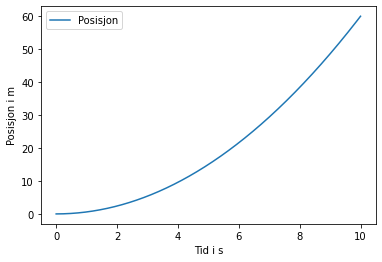

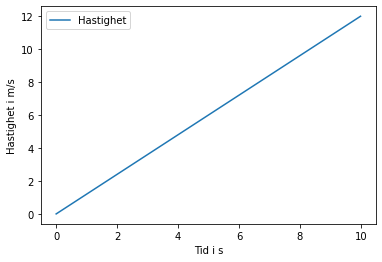

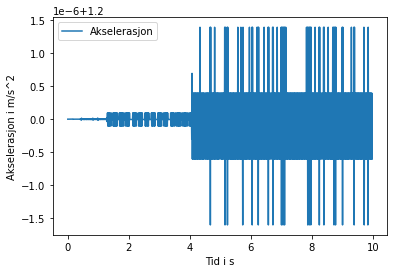

In [67]:
from pylab import *

data = loadtxt('posisjon.txt', float, skiprows=1)

tid = data[:,0]
posisjon = data[:,1]

hastighet = []
for i in range(len(tid)-1):
    dy_h = posisjon[i+1] - posisjon[i]
    dx_h = tid[i+1] - tid[i]
    h = dy_h / dx_h
    hastighet.append(h)

akselerasjon = []
for j in range(len(tid)-2):
    dy_a = hastighet[j+1] - hastighet[j]
    dx_a = tid[j+1] - tid[j]
    a = dy_a / dx_a
    akselerasjon.append(a)

plot(tid, posisjon, label='Posisjon')
xlabel('Tid i s')
ylabel('Posisjon i m')
legend()
show()

plot(tid[:-1], hastighet, label='Hastighet')
xlabel('Tid i s')
ylabel('Hastighet i m/s')
legend()
show()

plot(tid[:-2], akselerasjon, label='Akselerasjon')
xlabel('Tid i s')
ylabel('Akselerasjon i m/s^2')
legend()
show()

### 7.14

Analytisk verdi: 12,0

#### Rektangelmetoden:

In [68]:
def f(x):
    return x**2 - 4 * x + 5

def rektangel(a,b,N):
    dx = (b - a) / N
    A = f(a)
    
    for i in range(1,N):
        A += f(a + i * dx)
    
    return A * dx

print(f'For N lik 1 blir integralet av grafen {rektangel(2,5,1)}')
print(f'For N lik 10 blir integralet av grafen {rektangel(2,5,10)}')
print(f'For N lik 1000 blir integralet av grafen {rektangel(2,5,1000)}')

For N lik 1 blir integralet av grafen 3.0
For N lik 10 blir integralet av grafen 10.694999999999999
For N lik 1000 blir integralet av grafen 11.986504500000006


#### Trapesmetoden:

In [69]:
def f(x):
    return x**2 - 4 * x + 5

def trapes(a,b,N):
    dx = (b - a) / N
    A = (f(a) + f(b)) / 2
    
    for i in range(1,N):
        A += f(a + i * dx)
    
    return A * dx

print(f'For N lik 1 blir integralet av grafen {trapes(2,5,1)}')
print(f'For N lik 10 blir integralet av grafen {trapes(2,5,10)}')
print(f'For N lik 1000 blir integralet av grafen {trapes(2,5,1000)}')

For N lik 1 blir integralet av grafen 16.5
For N lik 10 blir integralet av grafen 12.045000000000002
For N lik 1000 blir integralet av grafen 12.000004500000005


Siden den analytiske verdien er 12,0 ga ingen av alternativene helt riktig svar, men etter hvert som antall rektangler og trapeser ble stort, ble avviket fra den analytiske verdien mindre og mindre. Med rektangelmetoden fikk jeg alltid litt for lavt svar, siden høyden på rektangelet regnes ut ifra rektangelets venstre hjørne. Med trapesmetoden kom jeg fortere nærme et ganske riktig svar, og det var mindre avvik fra den analytiske verdien med denne metoden, men det var allikevel overraskende at jeg fikk 16,5 som svar da jeg brukte bare ett trapes siden grafen for den deriverte er lineær.

## Teoridel

Analytisk derivasjon er derivasjon der man lar ∆x gå mot 0, altså finner man den momentane vekstfarten i akkurat det punktet, mens ved numerisk derivasjon forenkler man det ved at man lar ∆x være et lite tall og da regner ut den gjennomsnittlige vekstfarten mellom to punkter som er veldig nærme hverandre. Numerisk integrasjon er integrasjon der man regner ut det omtrentlige arealet under en graf, og forenkler det ved å lage mange bokser (for eksempel i form av rektangler eller trapeser) som passer best mulig med grafen, og summerer arealet av disse.

Ved derivasjon varierer tilnærmingene med dx fordi dx er ∆x, altså x_1 - x, og jo mindre forskjellen på x_1 og x det er, jo mindre vil forskjell på ∆x og 0 være, som er det man lar ∆x gå mot når man deriverer analytisk. Derfor vil svaret på den numeriske derivasjonen generelt avvike mindre og mindre jo nærmere dx er 0, og mer og mer jo lengre unna dx er 0.

Ved integrasjon varierer tilnærmingene med N fordi N er antall bokser som er brukt til å regne ut integralet, og jo flere bokser som er brukt, jo mindre vil forskjellen på x-verdiene i en boks være, og da også forskjellen på f(x)-verdiene. Det vil si at jo flere bokser som er brukt, jo mindre avvik vil det generelt være fra den analytiske integrasjonen, og motsatt.